In [2]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\ryanc\anaconda3\envs\pyvizenv2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set the ticker "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY" . These are the top 10 fintech stock found in Referenc: Motley fool , 
# 
ticker =["SQ","ATV","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY"
df_portfolio_year = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

df_portfolio_year.head()

ticker =["SPY"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for S&P 500
df_sp500 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

df_sp500.head()

SPY                                  
                             open    high     low   close    volume
time                                                               
2019-12-31 00:00:00-05:00  320.53  322.13  320.15  321.89  38134256
2020-01-02 00:00:00-05:00  323.54  324.85  322.53  324.84  48217559
2020-01-03 00:00:00-05:00  321.16  323.64  321.10  322.44  58408809
2020-01-06 00:00:00-05:00  320.49  323.73  320.36  323.67  43105385
2020-01-07 00:00:00-05:00  323.02  323.54  322.24  322.76  33909984

In [5]:
#Second Investment Portfolio datafram
existing_investment_df = pd.read_csv("Investment_Tracker.csv")
existing_investment_df

,Company,Category,Shares,Price,Change,Change (%),Portfolio %,Value
0,AAPL,US Stocks,"1,200",$143.16,$0.24,0.17%,7%,"$171,792.00"
1,NKE,Bonds,"1,300",$135.09,($2.45),-1.78%,8%,"$175,617.00"
2,GLW,International Stocks,"1,200",$37.18,($1.27),-3.30%,2%,"$44,616.00"
3,NEE,Cash,"10,000",$85.25,($1.75),-2.01%,37%,"$852,500.00"
4,IBM,Real Estate,125,$122.48,$3.86,3.25%,1%,"$15,310.00"
5,UIS,Commodities,100,$24.58,$0.63,2.63%,0%,"$2,458.00"
6,TROX,Commodities,250,$16.42,($0.12),-0.73%,0%,"$4,105.00"
7,BND,Bonds,275,$87.57,($0.01),-0.01%,1%,"$24,081.75"
8,MSFT,US Stocks,"2,000",$232.33,$2.80,1.22%,20%,"$464,660.00"
9,JNJ,NaN,"1,000",$170.48,$4.61,2.78%,7%,"$170,480.00"


In [6]:
# Create and empty DataFrame for closing prices for "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY"
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of "SQ","ADYEY","MELI","GDOT","PYPL","FISV","GS","V","AXP","SPY"
df_closing_prices["SQ"] = df_portfolio_year["SQ"]["close"]
df_closing_prices["ATV"] = df_portfolio_year["ATV"]["close"]
df_closing_prices["MELI"] = df_portfolio_year["MELI"]["close"]
df_closing_prices["GDOT"] = df_portfolio_year["GDOT"]["close"]
df_closing_prices["PYPL"] = df_portfolio_year["PYPL"]["close"]
df_closing_prices["FISV"] = df_portfolio_year["FISV"]["close"]
df_closing_prices["GS"] = df_portfolio_year["GS"]["close"]
df_closing_prices["V"] = df_portfolio_year["V"]["close"]
df_closing_prices["AXP"] = df_portfolio_year["AXP"]["close"]
df_closing_prices["PFE"] = df_portfolio_year["PFE"]["close"]
df_closing_prices["SPY"] = df_sp500["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,SQ,ATV,MELI,GDOT,PYPL,FISV,GS,V,AXP,PFE,SPY
2019-12-31,62.56,18.3350,571.93,23.29,108.21,115.619,229.880,187.90,124.46,39.16,321.89
2020-01-02,63.83,18.5437,610.50,23.35,110.75,115.500,234.360,191.14,125.89,39.14,324.84
2020-01-03,63.00,18.4200,608.02,22.97,108.77,116.370,231.510,189.61,124.56,38.92,322.44
2020-01-06,62.57,18.4214,606.69,23.32,110.16,116.940,233.950,189.16,124.09,38.87,323.67
2020-01-07,64.57,18.4500,625.00,23.41,109.68,116.430,235.515,188.69,123.41,38.76,322.76


In [7]:
# Compute daily returns after cleaning the null values if any
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,SQ,ATV,MELI,GDOT,PYPL,FISV,GS,V,AXP,PFE,SPY
2020-01-02,0.020301,0.011383,0.067438,0.002576,0.023473,-0.001029,0.019488,0.017243,0.011490,-0.000511,0.009165
2020-01-03,-0.013003,-0.006671,-0.004062,-0.016274,-0.017878,0.007532,-0.012161,-0.008005,-0.010565,-0.005621,-0.007388
2020-01-06,-0.006825,0.000076,-0.002187,0.015237,0.012779,0.004898,0.010540,-0.002373,-0.003773,-0.001285,0.003815
2020-01-07,0.031964,0.001553,0.030180,0.003859,-0.004357,-0.004361,0.006689,-0.002485,-0.005480,-0.002830,-0.002812
2020-01-08,0.046926,-0.004878,0.013408,0.016660,0.019602,0.003006,0.009617,0.017118,0.017341,0.007482,0.005143


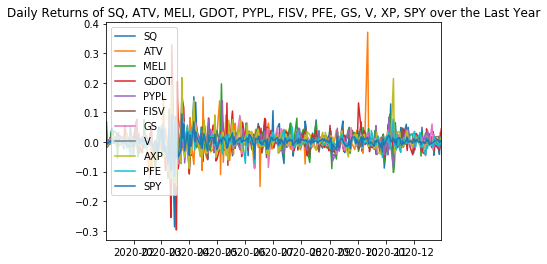

In [8]:
# Plot daily returns for "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY"
df_daily_returns.plot(title="Daily Returns of SQ, ATV, MELI, GDOT, PYPL, FISV, PFE, GS, V, XP, SPY over the Last Year")

In [20]:
# Running simulations on top 10 fintech stocks along with SPY
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_simulation_all = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10],
    num_simulation = num_sims,
    num_trading_days = 252
)
MC_simulation_all.portfolio_data.head()

ATV                                   \
                              open     high    low    close  volume   
time                                                                  
2019-12-31 00:00:00-05:00  18.3300  18.3900  17.91  18.3350  1550.0   
2020-01-02 00:00:00-05:00  18.4616  18.5437  18.35  18.5437  1610.0   
2020-01-03 00:00:00-05:00  18.5200  18.5200  18.42  18.4200  1729.0   
2020-01-06 00:00:00-05:00  18.5300  18.5300  18.35  18.4214   559.0   
2020-01-07 00:00:00-05:00  18.5000  18.5000  18.02  18.4500  3214.0   

                                           AXP                             \
                          daily_return    open     high       low   close   
time                                                                        
2019-12-31 00:00:00-05:00          NaN  124.29  124.574  123.7800  124.46   
2020-01-02 00:00:00-05:00     0.011383  124.66  126.270  124.2300  125.89   
2020-01-03 00:00:00-05:00    -0.006671  124.32  125.100  123.9400  124.56   
2020-01-06 00:00:00-05:00     0.000076  123.37  124.160  123.1204  124.09   
2020-01-07 00:00:00-05:00     0.001553  123.47  124.400  123.3600  123.41   

                           ...     SQ                                    V  \
                           ...    low  close   volume daily_return    open   
time                       ...                                               
2019-12-31 00:00:00-05:00  ...  61.00  62.56  5005015          NaN  187.06   
2020-01-02 00:00:00-05:00  ...  62.95  63.83  4571798     0.020301  189.00   
2020-01-03 00:00:00-05:00  ...  62.33  63.00  4870465    -0.013003  188.15   
2020-01-06 00:00:00-05:00  ...  61.13  62.57  5681852    -0.006825  188.00   
2020-01-07 00:00:00-05:00  ...  63.66  64.57  9016472     0.031964  189.59   

                                                                          
                             high      low   close   volume daily_return  
time                                                                      
2019-12-31 00:00:00-05:00  188.00  186.540  187.90  3506421          NaN  
2020-01-02 00:00:00-05:00  191.14  188.720  191.14  5240901     0.017243  
2020-01-03 00:00:00-05:00  190.96  187.920  189.61  3752535    -0.008005  
2020-01-06 00:00:00-05:00  189.21  187.163  189.16  4880802    -0.002373  
2020-01-07 00:00:00-05:00  190.10  188.600  188.69  3727880    -0.002485  

[5 rows x 60 columns]

In [21]:
# Running simulations on all stocks
MC_simulation_all.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008728,1.012301,1.001123,0.989158,0.990465,1.011274,0.984369,0.987045,1.006021,1.000517,...,1.003017,0.989982,1.004040,0.998454,1.006509,0.997414,0.997282,0.992967,0.974227,0.992648
2,1.009450,1.008687,1.009978,0.989806,0.982696,1.015266,0.960426,0.993040,0.987154,0.984578,...,1.007497,0.991647,1.010199,1.006196,1.006283,1.017761,0.980020,0.979403,0.965894,1.005704
3,1.031256,1.016024,1.005982,0.994152,0.978118,1.028360,0.966665,1.004351,0.990983,0.990956,...,1.007658,0.976918,1.012524,1.003093,1.004773,1.021281,0.978668,0.993135,0.970453,0.995326
4,1.034889,1.019621,1.015168,0.998863,1.000934,1.020741,0.961156,1.019309,0.986259,0.986719,...,1.001959,0.961937,1.018675,1.016971,1.012734,1.036567,0.981563,0.986520,0.970708,0.998806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2.041732,1.843154,1.256693,1.570942,1.865746,2.003838,1.737924,1.577061,1.866856,1.581004,...,1.484503,1.580571,1.705479,1.758960,1.628802,1.839303,1.931756,1.423090,2.014073,1.547510
249,2.038173,1.838680,1.279443,1.572725,1.867178,1.996406,1.725928,1.582692,1.859468,1.568901,...,1.464853,1.599029,1.703646,1.743557,1.613299,1.832218,1.992110,1.413939,2.051003,1.571297
250,2.066702,1.793648,1.277542,1.579582,1.853023,2.019188,1.702565,1.587615,1.859871,1.583871,...,1.477592,1.644974,1.695078,1.769271,1.598771,1.844896,1.953098,1.442105,2.029882,1.562838
251,2.064055,1.791734,1.287374,1.582765,1.830203,2.013216,1.696951,1.613576,1.862872,1.578581,...,1.480353,1.632941,1.687109,1.750443,1.577843,1.871309,1.939202,1.492487,1.994210,1.582119


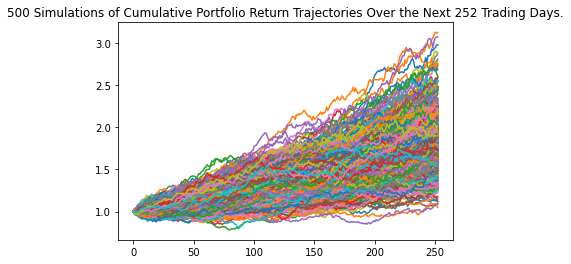

In [22]:
# Create line plot of cumulative returns for our portfolio
all_line_plot = MC_simulation_all.plot_simulation()

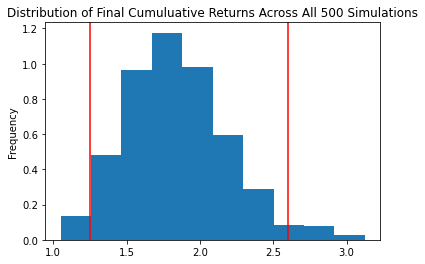

In [23]:
# Create distribution plot of cumulative returns for our portfolio
all_dist_plot = MC_simulation_all.plot_distribution()

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
all_tbl = MC_simulation_all.summarize_cumulative_return()

# Print summary statistics
print(all_tbl)

count           500.000000
mean              1.843443
std               0.354123
min               1.048881
25%               1.592174
50%               1.808717
75%               2.046027
max               3.124172
95% CI Lower      1.250314
95% CI Upper      2.600964
Name: 252, dtype: float64


In [25]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $1,000,000 investments in stocks
all_ci_lower = round(all_tbl[8]*1000000,2)
all_ci_upper = round(all_tbl[9]*1000000,2)
print(all_ci_lower)
print(all_ci_upper)

1250314.04
2600964.34


In [26]:
ticker =["SPY"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for S&P 500
df_sp500 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

df_sp500.head()

SPY                                  
                             open    high     low   close    volume
time                                                               
2019-12-31 00:00:00-05:00  320.53  322.13  320.15  321.89  38134256
2020-01-02 00:00:00-05:00  323.54  324.85  322.53  324.84  48217559
2020-01-03 00:00:00-05:00  321.16  323.64  321.10  322.44  58408809
2020-01-06 00:00:00-05:00  320.49  323.73  320.36  323.67  43105385
2020-01-07 00:00:00-05:00  323.02  323.54  322.24  322.76  33909984

In [27]:
# Running simulations on S&P 500
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_simulation_spy = MCSimulation(
    portfolio_data = df_sp500,
    weights = [1],
    num_simulation = num_sims,
    num_trading_days = 252
)
MC_simulation_spy.portfolio_data.head()

SPY                                    \
                             open    high     low   close    volume   
time                                                                  
2019-12-31 00:00:00-05:00  320.53  322.13  320.15  321.89  38134256   
2020-01-02 00:00:00-05:00  323.54  324.85  322.53  324.84  48217559   
2020-01-03 00:00:00-05:00  321.16  323.64  321.10  322.44  58408809   
2020-01-06 00:00:00-05:00  320.49  323.73  320.36  323.67  43105385   
2020-01-07 00:00:00-05:00  323.02  323.54  322.24  322.76  33909984   

                                        
                          daily_return  
time                                    
2019-12-31 00:00:00-05:00          NaN  
2020-01-02 00:00:00-05:00     0.009165  
2020-01-03 00:00:00-05:00    -0.007388  
2020-01-06 00:00:00-05:00     0.003815  
2020-01-07 00:00:00-05:00    -0.002812

In [28]:
MC_simulation_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015491,0.995623,1.028263,1.033634,1.001158,0.975190,0.969661,0.988330,1.018213,1.014362,...,0.992734,0.995893,1.054174,1.022604,1.023502,1.022069,1.005820,0.999389,0.975885,1.016070
2,0.976217,1.015242,1.039727,1.024050,1.034066,0.973182,0.978272,1.010707,1.040739,1.054037,...,0.993297,0.980450,1.030384,1.040234,1.051425,1.009493,0.987433,0.956506,0.999687,1.020277
3,0.969854,1.029871,1.035945,1.046019,0.999481,0.985834,0.950695,1.004944,1.040541,1.077411,...,0.957856,0.996957,1.041896,1.052671,1.037823,0.980856,0.996397,0.970181,1.023093,1.004065
4,0.974431,1.068656,1.085020,1.058965,1.005026,0.982290,0.959262,1.013409,1.077045,1.057387,...,0.909141,0.992233,1.054858,1.057275,1.017045,0.987563,1.013031,0.986772,1.046606,0.980606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.638738,1.004730,1.925491,2.087515,1.571505,0.952878,1.331904,1.609830,1.222518,1.291893,...,0.987579,1.608161,1.046232,1.382766,0.999038,1.394174,1.265865,2.615340,0.615656,1.349320
249,1.643644,0.989230,1.917438,2.010743,1.539812,0.949077,1.347391,1.609111,1.196512,1.267760,...,1.009124,1.617888,1.072011,1.390100,1.029377,1.378262,1.251887,2.575364,0.615101,1.329138
250,1.619185,1.030700,1.917173,1.946914,1.498808,0.968911,1.309657,1.658118,1.188485,1.262390,...,0.983466,1.556045,1.089417,1.394387,1.034534,1.405038,1.225936,2.533136,0.634057,1.357753
251,1.655845,1.008737,1.899031,1.905744,1.481925,0.965877,1.254937,1.639546,1.197155,1.283517,...,1.001556,1.567190,1.055292,1.363120,1.040521,1.400147,1.178600,2.538714,0.630683,1.348404


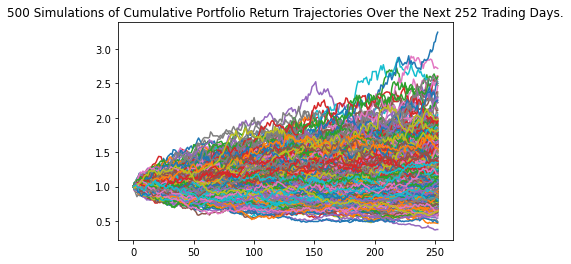

In [29]:
# Create line plot of cumulative returns for SPY
spy_line_plot = MC_simulation_spy.plot_simulation()

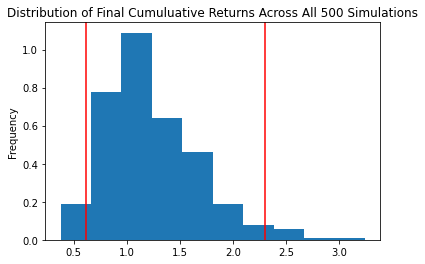

In [30]:
# Create distribution plot of cumulative returns for SPY
spy_dist_plot = MC_simulation_spy.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
spy_tbl = MC_simulation_spy.summarize_cumulative_return()

# Print summary statistics for SPY
print(spy_tbl)

count           500.000000
mean              1.228659
std               0.433371
min               0.375930
25%               0.925627
50%               1.141716
75%               1.459821
max               3.242707
95% CI Lower      0.617605
95% CI Upper      2.303616
Name: 252, dtype: float64


In [32]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $1,000,000 investments in SPY
spy_ci_lower = round(spy_tbl[8]*1000000,2)
spy_ci_upper = round(spy_tbl[9]*1000000,2)
print(spy_ci_lower)
print(spy_ci_upper)

617604.8
2303615.91


In [33]:
def investment(PMT, n, i):
    x = 0
    investment_balance = 0
    while x < n:
        investment_balance *= (1 + i)
        investment_balance += PMT
        x = x + 1

    return round(investment_balance, 2)

In [34]:
##### GETING BETAS FOR FINTECH STOCKS #####

In [35]:
#Getting the covariance of each Fintech stock
sq_covariance = df_daily_returns["SQ"].cov(df_daily_returns["SPY"])
atv_covariance = df_daily_returns["ATV"].cov(df_daily_returns["SPY"])
meli_covariance = df_daily_returns["MELI"].cov(df_daily_returns["SPY"])
gdot_covariance = df_daily_returns["GDOT"].cov(df_daily_returns["SPY"])
pypl_covariance = df_daily_returns["PYPL"].cov(df_daily_returns["SPY"])
fisv_covariance = df_daily_returns["FISV"].cov(df_daily_returns["SPY"])
gs_covariance = df_daily_returns["GS"].cov(df_daily_returns["SPY"])
v_covariance = df_daily_returns["V"].cov(df_daily_returns["SPY"])
axp_covariance = df_daily_returns["AXP"].cov(df_daily_returns["SPY"])
pfe_covariance = df_daily_returns["PFE"].cov(df_daily_returns["SPY"])
#Getting the variance of the S&P 500
variance = df_daily_returns["SPY"].var()

In [36]:
#Getting the Beta's of the Fintech Stocks
sq_beta = round(sq_covariance / variance , 2)
atv_beta = round(atv_covariance / variance, 2)
meli_beta = round(meli_covariance / variance, 2)
gdot_beta = round(gdot_covariance / variance, 2)
pypl_beta = round(pypl_covariance / variance, 2)
fisv_beta = round(fisv_covariance / variance, 2)
gs_beta = round(gs_covariance / variance, 2)
v_beta = round(v_covariance / variance, 2)
axp_beta = round(axp_covariance / variance, 2)
pfe_beta = round(pfe_covariance / variance, 2)


In [37]:
print(f"The Beta of SQ is {sq_beta}")
print(f"The Beta of ATV is {atv_beta}")
print(f"The Beta of MELI is {meli_beta}")
print(f"The Beta of GDOT is {gdot_beta}")
print(f"The Beta of PYPL is {pypl_beta}")
print(f"The Beta of FISV is {fisv_beta}")
print(f"The Beta of GS is {gs_beta}")
print(f"The Beta of V is {v_beta}")
print(f"The Beta of AXP is {axp_beta}")
print(f"The Beta of PFE is {pfe_beta}")

The Beta of SQ is 1.43
The Beta of ATV is 0.73
The Beta of MELI is 1.01
The Beta of GDOT is 1.44
The Beta of PYPL is 1.17
The Beta of FISV is 1.16
The Beta of GS is 1.28
The Beta of V is 1.13
The Beta of AXP is 1.48
The Beta of PFE is 0.69


In [38]:
# Sharpe Ratio's for Fintech Stocks

In [39]:
sq_sharpe = round((df_daily_returns["SQ"].mean() * 252) / (df_daily_returns["SQ"].std() * np.sqrt(252)), 2)
atv_sharpe = round((df_daily_returns["ATV"].mean() * 252) / (df_daily_returns["ATV"].std() * np.sqrt(252)), 2)
meli_sharpe = round((df_daily_returns["MELI"].mean() * 252) / (df_daily_returns["MELI"].std() * np.sqrt(252)), 2)
gdot_sharpe = round((df_daily_returns["GDOT"].mean() * 252) / (df_daily_returns["GDOT"].std() * np.sqrt(252)), 2)
pypl_sharpe = round((df_daily_returns["PYPL"].mean() * 252) / (df_daily_returns["PYPL"].std() * np.sqrt(252)), 2)
fisv_sharpe = round((df_daily_returns["FISV"].mean() * 252) / (df_daily_returns["FISV"].std() * np.sqrt(252)), 2)
gs_sharpe = round((df_daily_returns["GS"].mean() * 252) / (df_daily_returns["GS"].std() * np.sqrt(252)), 2)
v_sharpe = round((df_daily_returns["V"].mean() * 252) / (df_daily_returns["V"].std() * np.sqrt(252)), 2)
axp_sharpe = round((df_daily_returns["AXP"].mean() * 252) / (df_daily_returns["AXP"].std() * np.sqrt(252)), 2)
pfe_sharpe = round((df_daily_returns["PFE"].mean() * 252) / (df_daily_returns["PFE"].std() * np.sqrt(252)), 2)

In [40]:
print(f"The Sharpe Ratio of SQ is {sq_sharpe}")
print(f"The Sharpe Ratio of ATV is {atv_sharpe}")
print(f"The Sharpe Ratio of MELI is {meli_sharpe}")
print(f"The Sharpe Ratio of GDOT is {gdot_sharpe}")
print(f"The Sharpe Ratio of PYPL is {pypl_sharpe}")
print(f"The Sharpe Ratio of FISV is {fisv_sharpe}")
print(f"The Sharpe Ratio of GS is {gs_sharpe}")
print(f"The Sharpe Ratio of V is {v_sharpe}")
print(f"The Sharpe Ratio of AXP is {axp_sharpe}")
print(f"The Sharpe Ratio of PFE is {pfe_sharpe}")

The Sharpe Ratio of SQ is 2.08
The Sharpe Ratio of ATV is 0.55
The Sharpe Ratio of MELI is 2.11
The Sharpe Ratio of GDOT is 1.49
The Sharpe Ratio of PYPL is 1.72
The Sharpe Ratio of FISV is 0.2
The Sharpe Ratio of GS is 0.52
The Sharpe Ratio of V is 0.57
The Sharpe Ratio of AXP is 0.27
The Sharpe Ratio of PFE is 0.01
